In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

%matplotlib inline

In [ ]:
data = pd.read_csv('dataset/weight-height.csv')

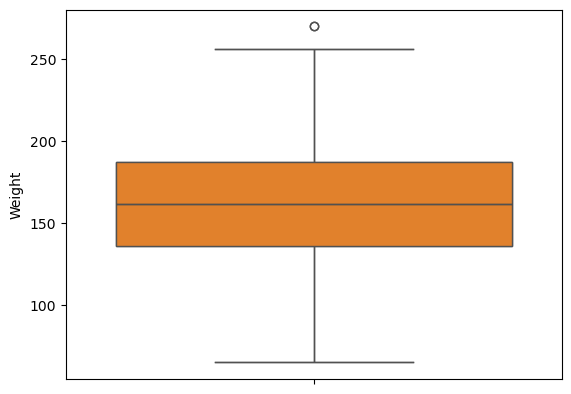

In [9]:
sns.boxplot(data=data['Weight'])
plt.show()

In [6]:
Q1 = data['Weight'].quantile(0.25)
Q3 = data['Weight'].quantile(0.75)
IQR = Q3 - Q1

In [7]:
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

Q1: 135.8180513055015, Q3: 187.16952486868348, IQR: 51.35147356318197


In [10]:
data['Weight'].describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

In [11]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [12]:
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: 58.79084096072856, Upper Bound: 264.19673521345646


In [15]:
df = data[(data['Weight'] < lower_bound) | (data['Weight'] > upper_bound)]

In [16]:
df

,Gender,Height,Weight
2014,Male,78.998742,269.989699


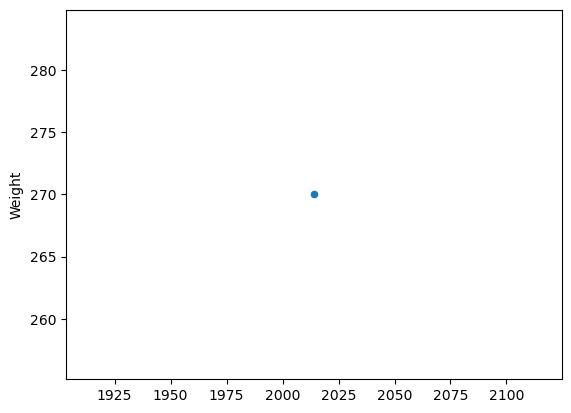

In [18]:
sns.scatterplot(data=df['Weight'])
plt.show()

In [20]:
data['z_score'] = zscore(data['Weight'])
data

,Gender,Height,Weight,z_score
0,Male,73.847017,241.893563,2.505797
1,Male,68.781904,162.310473,0.027101
2,Male,74.110105,212.740856,1.597806
3,Male,71.730978,220.042470,1.825222
4,Male,69.881796,206.349801,1.398750
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.768151
9996,Female,67.067155,170.867906,0.293631
9997,Female,63.867992,128.475319,-1.026730
9998,Female,69.034243,163.852461,0.075127


In [22]:
outliers_zscore = data[(data['z_score'] > 3) | (data['z_score'] < -3)]

In [23]:
outliers_zscore

,Gender,Height,Weight,z_score
2014,Male,78.998742,269.989699,3.380880
9285,Female,54.263133,64.700127,-3.013073


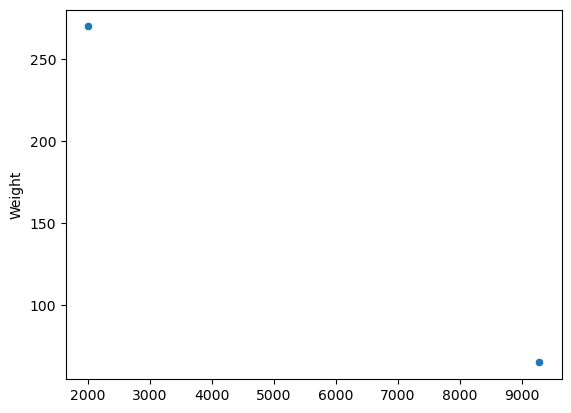

In [24]:
sns.scatterplot(data=outliers_zscore['Weight'])
plt.show()